# Forêt Aléatoire

[![Index](https://img.shields.io/badge/Index-blue)](../index.ipynb)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/digillia/Digillia-Colab/blob/main/algorithms/random-forest.ipynb)

L'algorithme de forêt aléatoire (Random Forest) est une technique d'apprentissage automatique utilisée pour améliorer la précision des prédictions. Il repose sur la création d'un ensemble de nombreux [arbres de décision](./decision-trees.ipynb). Pour construire chaque arbre, un échantillon aléatoire est prélevé à partir des données d'entraînement, et à chaque étape de construction, les caractéristiques les plus importantes sont sélectionnées pour diviser les données. Chaque arbre est construit de manière indépendante.

Lorsqu'il est temps de faire des prédictions, chaque arbre donne sa propre prédiction, et le résultat final est obtenu en agrégeant ces prédictions. Dans la classification, on utilise un vote majoritaire, tandis qu'en régression, on calcule la moyenne des prédictions. Cette approche d'ensemble permet de réduire la variance et de mieux généraliser aux données inconnues.

Les forêts aléatoires sont appréciées pour leur robustesse, leur capacité à gérer des ensembles de données complexes et leur résistance au surapprentissage. Elles sont couramment utilisées dans divers domaines tels que la classification d'images, la prédiction de prix, la détection de fraudes, et bien d'autres applications en apprentissage automatique.

[![Wikipedia](https://img.shields.io/badge/Wikipedia-lightgrey)](https://en.wikipedia.org/wiki/Random_forest)

In [1]:
# Supprimer les commentaires pour installer
# !pip3 install -q -U scikit-learn
# !pip3 install -q -U matplotlib
# !pip3 install -q -U mlxtend

## Données

Création d'un jeu de données synthétiques:

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

random_state=123

# Créer les données
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    class_sep=.9,
    random_state=random_state,
)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Vérifier les dimensions (division 80%-20%)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 2) (100, 2) (400,) (100,)


Visualisation:

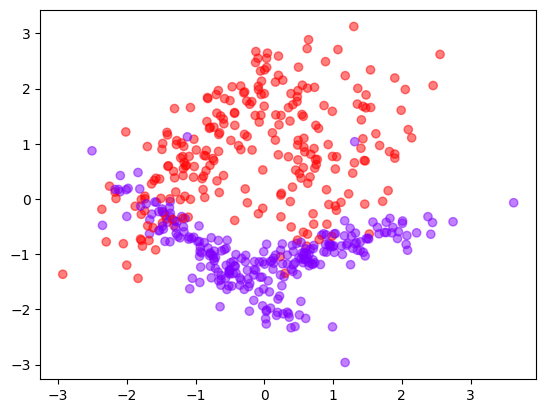

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.scatter(X[:,0], X[:,1], alpha=0.5, c=y, cmap='rainbow')

## Forêts Aléatoires avec SciKit-Learn

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [4]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(max_depth=3, random_state=random_state)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Train accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, y_pred))

Train accuracy: 0.935
Test accuracy: 0.87


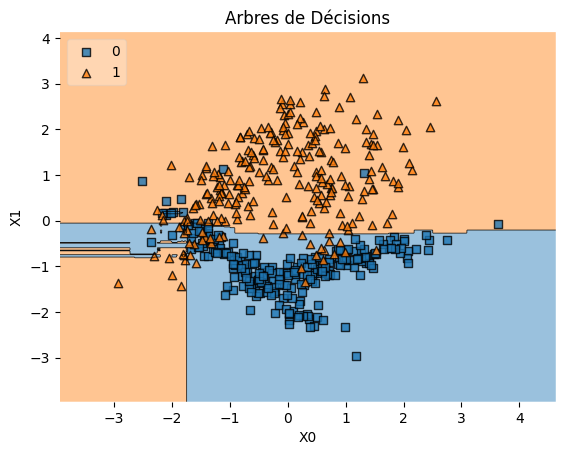

In [5]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=clf, legend=2) # X_highlight=X_test)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Arbres de Décisions')
plt.show()